<h1> Revisão Sistemática </h1>
</br>
Escrever funções para mostrar os gráficos capazes de responder as seguintes questões:

Sobre os trabalhos selecionados:
<ul>
<li>Quais são as palavras-chaves utilizadas?</li>
<li>Qual o percentual de acerto? (quantas palavras da string de busca o artigo curtiu(????))</li>
<li>Qual o número de páginas?</li>
</ul>
Sobre os trabalhos cortados:
<ul>
<li>Quais são as palavras-chaves utilizadas?</li>
<li>Quantas vezes as palavras utilizadas na string de busca apareceram nos artigos?</li>
</ul>

Para todos (feita):
<ul>
<li>Qual o ano de publicação?</li>
</ul>

In [15]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [48]:
'''Importar os CSVs'''

#df1 = pd.DataFrame(pd.read_csv("todos.csv"))
df2 = pd.DataFrame(pd.read_csv("menosdedois.csv"))
df3 = pd.DataFrame(pd.read_csv("maisdedois.csv"))
df3

IOError: File menosdedois.csv does not exist

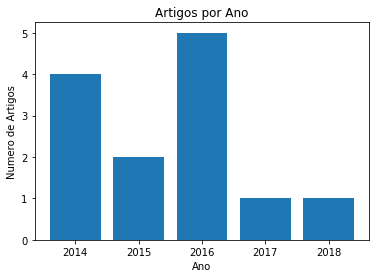

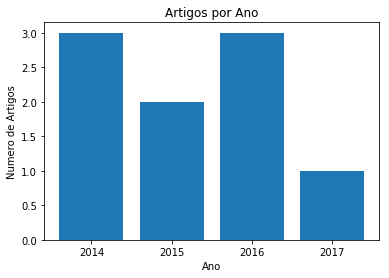

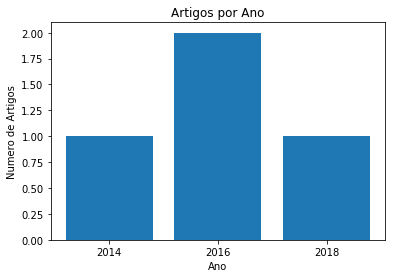

In [33]:
def mostrar_grafico_artigos_por_ano(df):
    dfPoint = pd.DataFrame(np.array(df.iloc[1:,8]))
    dfPoint.columns = ['ano']
    lista_de_anos = dfPoint['ano'].tolist()

    anos_dict = []
    for ano in lista_de_anos:
        e = (ano, lista_de_anos.count(ano))
        if e not in anos_dict:
            anos_dict.append(e)

    anos_dict.sort()
       
    plt.title("Artigos por Ano")
    plt.xlabel("Ano")
    plt.ylabel("Numero de Artigos")

    plt.bar(range(len(anos_dict)), [e[1] for e in anos_dict], align='center')
    plt.xticks(range(len(anos_dict)), [e[0] for e in anos_dict])
    plt.show()

mostrar_grafico_artigos_por_ano(df1)
mostrar_grafico_artigos_por_ano(df2)
mostrar_grafico_artigos_por_ano(df3)

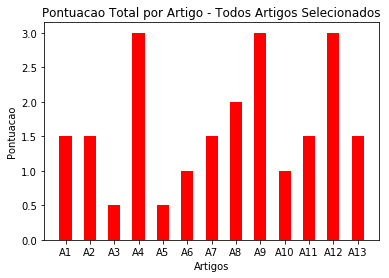

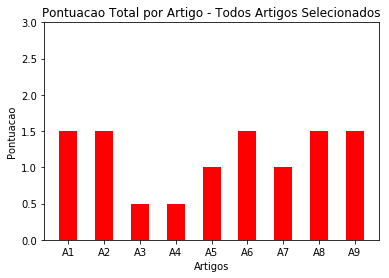

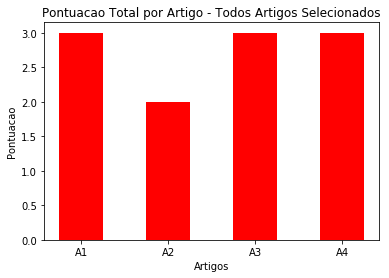

In [44]:
def mostrar_grafico_pontuacao_total_por_artigo(df):
    somatorio = pd.DataFrame(np.array(df.iloc[1:,7]))
    somatorio.columns = ['somatorio']
    somatorio = somatorio.apply(pd.to_numeric)

    s = somatorio['somatorio']

    N = len(s)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence

    p1t = plt.bar(ind, s, width, color='red', align='center')

    plt.autoscale(enable=True, axis='both', tight=None)
    plt.ylabel('Pontuacao')
    plt.xlabel('Artigos')
    plt.title('Pontuacao Total por Artigo - Todos Artigos Selecionados')
#     plt.xticks(ind,('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12', 'A13'))
    '''Mais de 2 Pontos'''
    plt.xticks(ind,('A4','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12', 'A13'))
    '''Menos de 2 Pontos'''
#     plt.xticks(ind,('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12', 'A13'))
    plt.yticks(np.arange(0, 3.5, 0.5))
    plt.show()
    
mostrar_grafico_pontuacao_total_por_artigo(df1)
mostrar_grafico_pontuacao_total_por_artigo(df2)
mostrar_grafico_pontuacao_total_por_artigo(df3)


In [28]:
def mostrar_histograma_artigos_pontuacao(df, normalizado):

    dfPoint = pd.DataFrame(np.array(df.iloc[1:,7]))

    dfPoint.columns = ['somatorio']
    dfPoint = dfPoint.apply(pd.to_numeric)

    hist=np.histogram(dfPoint['somatorio'], density=True)

    plt.hist(dfPoint['somatorio'], bins='auto', normed=normalizado)  # arguments are passed to np.histogram
    plt.title("Histograma - Pontuacao dos Artigos")
    plt.xlabel("Pontuacao")
    plt.ylabel("Numero de Artigos")
    plt.show()
    
mostrar_histograma_artigos_pontuacao(df1)
mostrar_histograma_artigos_pontuacao(df2)
mostrar_histograma_artigos_pontuacao(df3)

TypeError: mostrar_histograma_artigos_pontuacao() takes exactly 2 arguments (1 given)

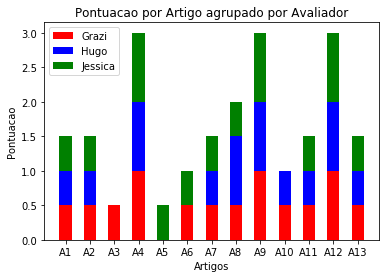

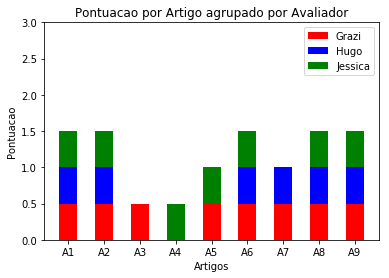

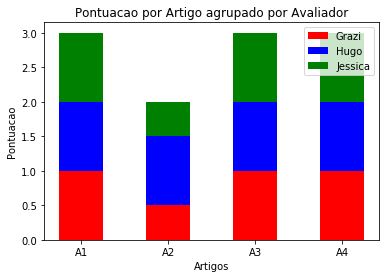

In [41]:
def mostrar_grafico_pontuacao_parcial_por_artigo(df):

    notaGrazi = pd.DataFrame(np.array(df.iloc[1:,4]))
    notaHugo = pd.DataFrame(np.array(df.iloc[1:,5]))
    notaJessica = pd.DataFrame(np.array(df.iloc[1:,6]))

    dfPoint = pd.concat([notaGrazi,notaHugo,notaJessica],axis=1)
    dfPoint.columns = ['notaGrazi','notaHugo','notaJessica']
    dfPoint = dfPoint.apply(pd.to_numeric)

    g = dfPoint['notaGrazi']
    j = dfPoint['notaJessica']
    h = dfPoint['notaHugo']

    N = len(dfPoint)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, g, width, color='red')
    p2 = plt.bar(ind, h, width, bottom=g, color='blue')
    p3 = plt.bar(ind, j, width, bottom=h+g, color='green')

    plt.ylabel('Pontuacao')
    plt.xlabel('Artigos')
    plt.title('Pontuacao por Artigo agrupado por Avaliador')
    plt.xticks(ind,('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12', 'A13'))
    plt.yticks(np.arange(0, 3.5, 0.5))
    plt.legend((p1[0], p2[0],p3[0]), ('Grazi','Hugo','Jessica'))
    plt.show()

mostrar_grafico_pontuacao_parcial_por_artigo(df1)
mostrar_grafico_pontuacao_parcial_por_artigo(df2)
mostrar_grafico_pontuacao_parcial_por_artigo(df3)

<h2>Rascunho de Códigos</h2>

In [40]:
'''Calculando Médias:'''

notaGrazi = pd.DataFrame(np.array(df1.iloc[1:,4]))
notaHugo = pd.DataFrame(np.array(df1.iloc[1:,5]))
notaJessica = pd.DataFrame(np.array(df1.iloc[1:,6]))

dfPoint = pd.concat([notaGrazi,notaHugo,notaJessica],axis=1)
dfPoint.columns = ['notaGrazi','notaHugo','notaJessica']
dfPoint = dfPoint.apply(pd.to_numeric)
    
mediaGrazi = dfPoint['notaGrazi'].mean()
mediaJessica = dfPoint['notaJessica'].mean()
mediaHugo = dfPoint['notaHugo'].mean()

print(mediaGrazi)
print(mediaJessica)
print(mediaHugo)

0.576923076923
0.538461538462
0.538461538462
